# IIC-2433 Minería de Datos UC

## Actividad en clase

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- nltk 3.7
- keras 2.9.0
- tensorflow 2.9.1

### Vamos a cargar los datos del dataset de la moda

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

### Son imágenes de prendas de vestuario y accesorios

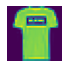

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(x_train[1,])
plt.show()

### Defina la clase sampling del VAE

In [3]:
class Sampling(layers.Layer):

    def call(self, inputs):
        ...

### Defina el encoder para que pase por dos capas convolucionales 2D, una capa flatten y una densa que colapsa a 32 dims. Agregue mu, var y sampling.

In [4]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))

...

encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 64)   640         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 32)     18464       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 1568)         0           ['conv2d_1[0][0]']               
                                                                                            

### Defina el decoder. Tenga cuidado al dimensionar los parámetros de manera que pueda reconstruir las imágenes manteniendo las dimensiones de la entrada.

In [5]:
latent_inputs = keras.Input(shape=(latent_dim,))

...

decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 1568)              4704      
                                                                 
 reshape (Reshape)           (None, 7, 7, 32)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       18496     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      73856     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        1153

### Defina el VAE. 

In [6]:
class VAE(keras.Model):
    ...
    

### Normalice las imágenes al rango [0, 1] (train_norm = x_train / 255.0). Haga lo mismo para testing. Concatene training y testing y entrene el VAE por 20 epochs con batch_size=128 y optimizador Adam. Esto se va a tardar un poco.

In [7]:
mnist_fashion = np.concatenate([x_train, x_test], axis=0)
mnist_fashion = np.expand_dims(mnist_fashion, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
...


Epoch 1/20
547/547 [==============================] - 45s 80ms/step - loss: 363.5134 - reconstruction_loss: 308.0511 - kl_loss: 5.0923
Epoch 2/20
547/547 [==============================] - 44s 80ms/step - loss: 274.7873 - reconstruction_loss: 267.2295 - kl_loss: 5.9021
Epoch 3/20
547/547 [==============================] - 44s 80ms/step - loss: 269.3065 - reconstruction_loss: 263.0724 - kl_loss: 5.9978
Epoch 4/20
547/547 [==============================] - 42s 77ms/step - loss: 267.7609 - reconstruction_loss: 261.4317 - kl_loss: 6.0155
Epoch 5/20
547/547 [==============================] - 43s 79ms/step - loss: 267.0670 - reconstruction_loss: 260.3288 - kl_loss: 6.0437
Epoch 6/20
547/547 [==============================] - 44s 80ms/step - loss: 265.9505 - reconstruction_loss: 259.3813 - kl_loss: 6.0650
Epoch 7/20
547/547 [==============================] - 44s 80ms/step - loss: 265.2789 - reconstruction_loss: 258.7555 - kl_loss: 6.0830
Epoch 8/20
547/547 [==============================] - 4

### Defina una función de data_augmentation que genere dos imágenes que correspondan a objetos distintos. Cuando las identifique, muéstrelas.
### Use alguna función definida más arriba que le permita distinguir cuando dos imágenes son distintas. Use un umbral de error como parámetro de la función. Por ejemplo, si dos imágenes tienen un error > 500, se asume que son distintas.
### --

In [8]:
import random

def data_augmentation(umbral):
    
    ...
    
    return True
        
    
            

1/1 [==============================] - 0s 28ms/step


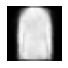

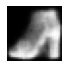

True

In [11]:
data_augmentation(650)